<a href="https://colab.research.google.com/github/silverstar0727/Graph-Neural-Networks/blob/main/Labs/Colab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS224W - Colab 0**

- 원본: http://web.stanford.edu/class/cs224w/
- 번역: https://github.com/silverstar0727

그래프 마이닝과 GNN의 기초적인 컨셉과 친숙해지기 위한 노트북이다.

해당 노트북은 NetworkX와 Pytorch geometric의 라이브러리를 사용하고, 아직 PyG의 모든 내용을 이해하지 못해도 앞으로 다룰 노트북에서 점차 알아가면 된다.


# NetworkX Tutorial

NetworkX는 그래프 마이닝이나 그래프 조작에서 흔히 쓰이는 툴이다. 이 튜토리얼에서 쓰인 코드는 아래의 링크를 참고하였다.

https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Setup

In [44]:
# NetworkX 패키지 임포트하기
import networkx as nx

## Graph

NetworkX는 유향, 무향 등의 그래프 타입을 저장하기 위한 다양한 클래스를 제공한다. 또한, 멀티 두가지를 포함한 멀티그래프 클래스도 제공한다.

구체적인 정보는 다음의 링크를 참고하자.
[NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [45]:
# 무방향 그래프 G 생성
G = nx.Graph()
print(G.is_directed()) # 그래프의 타입 확인

# 유향 그래프 H 생성
H = nx.DiGraph()
print(H.is_directed()) # 그래프의 타입 확인

# 그래프의 속성을 추가하기
G.graph["Name"] = "Bar" # 딕셔너리에 데이터를 저장하는 것과 동일
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Node를 속성과 함께 그래프에 추가하기

In [46]:
help(G.add_node)

Help on method add_node in module networkx.classes.graph:

add_node(node_for_adding, **attr) method of networkx.classes.graph.Graph instance
    Add a single node `node_for_adding` and update node attributes.
    
    Parameters
    ----------
    node_for_adding : node
        A node can be any hashable Python object except None.
    attr : keyword arguments, optional
        Set or change node attributes using key=value.
    
    See Also
    --------
    add_nodes_from
    
    Examples
    --------
    >>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_node(1)
    >>> G.add_node("Hello")
    >>> K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
    >>> G.add_node(K3)
    >>> G.number_of_nodes()
    3
    
    Use keywords set/change node attributes:
    
    >>> G.add_node(1, size=10)
    >>> G.add_node(3, weight=0.4, UTM=("13S", 382871, 3972649))
    
    Notes
    -----
    A hashable object is one that can be used as a key in a Python
    dictionary. This includ

In [47]:
# 하나의 노드의 속성과 함께 추가하기
G.add_node(0, feature=5, label=0) # node와 속성을 전달함. 이때의 이름을 제외한 나머지 인자는 dictionary형태로 노드의 속성이 됨. (아래에서확인)

# 노드 0의 속성 얻기
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [48]:
# 속성과 함께 여러개의 노드 추가
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) # add_nodes_from 메서드를 사용하고 인자로 list내부 (node, attrdict)의 튜플 형태로 전달

# for문으로 그래프를 iterable하게 사용할 수 있음.
for node in G.nodes(data=True): # data=True: 속성을 함께 반환함
  print(node)

# 노드의 개수를 얻을 수 있음
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

노드와 비슷하게 edge역시 속성과 함께 추가가 가능

In [49]:
# weight=0.5 속성을 갖도록 노드 0과 1사이의 엣지를 만들어 줌
G.add_edge(0, 1, weight=0.5)

# (0, 1) 엣지의 속성을 얻기
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [50]:
# 여러 엣지를 속성과 함께 추가하기
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# 노드와 마찬가지로 반복 가능.
for edge in G.edges(): # data=True를 추가하면 속성을 함께 반환
  print(edge)

# 엣지의 개수 반환
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

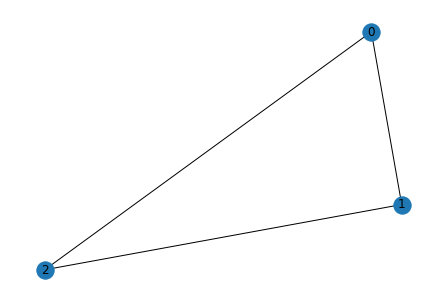

In [51]:
# 그래프 그리기
nx.draw(G, 
        with_labels = True) # label을 함께 그리기

## Node Degree and Neighbor

In [52]:
node_id = 1

# 개별 노드에 대한 degree를 확인할 수 있음
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# 개별 노드에 대한 이웃노드를 for-loop으로 얻을 수 있음.
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Other Functionalities

NetworkX는 그래프를 다루는 많은 유용한 메서드를 제공한다. 대표적으로 PageRank를 사용해보자. 

구체적인 문서는 다음을 참고하자. [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

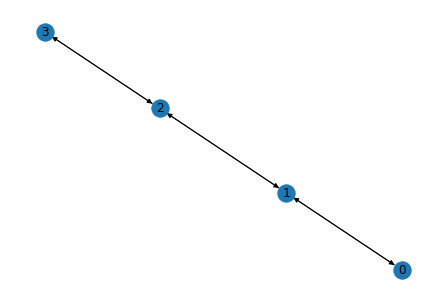

In [53]:
# 새로운 유향 그래프를 만들기, 이때의 각노드는 순차적으로 앞선 index의 노드만을 가리키도록 초기화된다.
num_nodes = 4
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# PageRank알고리즘으로부터 score를 얻기
pr = nx.pagerank(G, alpha=0.8)
pr

## Documentation

더 많은 정보들은 도큐먼트를 참고하자. [documentation](https://networkx.org/documentation/stable/).

# PyTorch Geometric Tutorial

PyG는 Pytorch의 확장 라이브러리로 GNN 모델을 개발하기 위해서 유용하게 사용된다. 많은 기초적인 layer와 벤치마크 데이터셋을 가지고 있다.

이 튜토리얼은  [Matthias Fey](https://rusty1s.github.io/#/)의 [colab](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI)를 사용하였다.


In [54]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.9.0+cu111


## Installing dependencies

PyG를 설치하는 것은 조금 까다로운데, 아래의 셀을 실행해야 한다(10분가량 소요된다). 문제가 발생하거나 더 많은 정보를 얻기 위해서는 다음의 페이지를 참고하자.[PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html). 

In [55]:
# Install torch geometric
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

## Visualization

In [56]:
# 시각화를 위한 헬퍼함수를 작성한다.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# NX와 Pytorch tensor 모두를 시각화 할 수 있는 함수이다.
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    # 데이터가 pytorch일 경우
    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    # 데이터가 NX일 경우
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Introduction

최근에 GNN은 DL의 중요한 분야로 급상승 했다. 이번 랩에서는 불규칙한 데이터(이미지나 텍스트가 아닌)를 위한 고전적인 DL을 일반화하고, NN을 이용하여 노드나 엣지와의 관계성을 파악하도록 한다.

이 튜토리얼은 PyG에 기반한 기초적인 GNN의 컨셉을 소개한다. PyG는 GNN을 위한 많은 유용한 함수를 가지고 있는 인기있는 라이브러리다. 

다음의 논문 [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)과 간단한 그래프 구조의 데이터인 [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)를 참고하여 더 구체적으로 살펴보자. 이 그래프는 34명의 가라데 동아리의 회원과 그들의 관계에 대한 데이터이다.

구성원의 상호작용으로 인해 발생한 커뮤니티를 파악해보자.

## Dataset

PyG는 간단히 위의 데이터를 받아올 수 있다.

[torch_geometric.datasets](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) 

In [57]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


데이터를 받아오면 이들의 정보를 우선적으로 파악한다. 예를들어 우리는 데이터가 하나의 그래프로 이루어져 있고, 각 노드는 34 차원의 특성 벡터를 갖는다는 것을 알 수 있다. 또한, 그래프는 4개의 클래스를 갖는데 이들은 커뮤니티에 해당한다.

아래의 셀에서 확인 하는 방법을 유심히 살펴보자

In [58]:
data = dataset[0]  # 전체 데이터셋 첫번째 데이터를 받아오자.

print(data)
print('==============================================================')

# 그래프에 대한 다양한 통계를 확인하는 방법을 잘 알아두자.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 9.18
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [59]:
# 엣지를 모두 출력해보자
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Data

각 그래프는 PyG의 그래프를 표현하기 위한 모든 정보를 가진 Data 클래스의 오브젝트이다. 우리는  간단히 출력을 통해서 언제든 이들의 요약된 정보를 확인할 수 있다.

데이터 오브젝트는 아래 4가지의 요소을 가진다.
* edge_index: 그래프의 연결 관계를 보여준다. 
* node_features: 노드의 개별 feature vector를 보여준다.(여기서는 각 노드가 34차원의 feature vector를 갖는다)
* node_labels: 각 노드의 label을 가진다.
* train_mask: 훈련시 사용할 노드와 사용하지 않을 노드를 분류하기 위한 정보를 가진다.

또한, data 오브젝트는 유용한 함수들을 제공하는데, isolated node, self-loop 등을 확인할 수 있다.


In [60]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


## Edge Index

엣지를 확인할 수도 있다.

In [61]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

각 엣지는 2개의 노드를 가진 튜플로 이뤄지는데, 첫번째는 출발 지점이고 두번째는 도착 노드이다. 

이러한 표현은 COO(coordinate) format으로 알려져 있고, sparse matrices를 표현하기 위해서 사용된다. 그리고 이것은 networkx형태로 바꾸어 시각화할 수 있다.

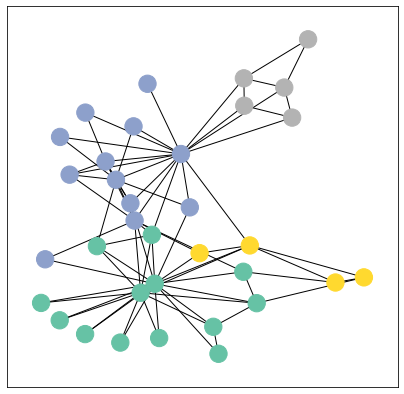

In [62]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

그리고 이제 우리는 첫번쨰 GNN모델을 만든다. 이 모델의 기본 구성요소로 GCN layer를  사용하고, PyG는 이미 GCNConv로 구현되어있다. 이것은 node feature representation x와 COO graph의 연결 표현인 edge_index를 사용한다.

GNN의 input은 
* Graph($G = (\mathcal{V}, \mathcal{E})$)
* Node($v_i \in \mathcal{V}$)
* Feature Vector($X_i^{(0)}$)

위의 3가지이다. 이때 함수 $f \to \mathcal{V} \times \mathcal{R}^d$를 학습하면, 우리의 downstream task에 따라서 다양한 형태의 아웃풋을 얻을 수 있다. 그리고 이들을 이용하여 다양한 예측을 수행할  수 있다.

여기서는 각 노드의 community 분류를 한다.

In [70]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


우선 우리는 모델을 위한 building block을 init메서드에서 정의를 하고, 이때 정의되는 각각의 gcn layer는 1-hop의 이웃의 정보를 합치는 것에 해당한다. 이들을 구성할 때에, 3-hop의 이웃의 정보를 합치는 것이 목표이므로 3개의 layer를 정의한다.

추가로, GCNConv 층은 node feature벡터의 차원을 2로 줄인다(34 -> 4 -> 4 -> 2). 각 레이어는 tanh의 비선형 활성화 함수를 사용한다.

이 과정이 끝나면 하나의 선형 변환(torch.nn.Linear)층을 통해서 노드를 4개의 클래스에 해당하는 값으로 매핑한다.

우리는 결과로부터 최종적인 노드 임베딩을 얻는다. 

Embedding shape: [34, 2]


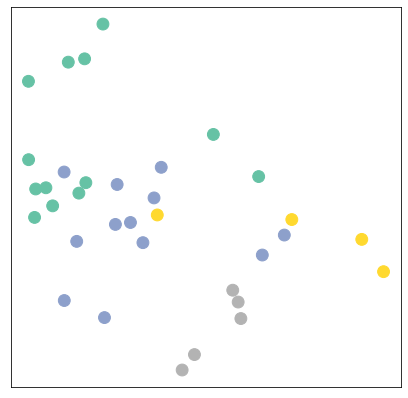

In [71]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

놀랍게도, 모델의 가중치를 훈련하기 전에도 모델은 그래프의 커뮤니티 구조와 매우 유사한 노드의 임베딩을 생성한다. 

모델의 가중치가 무작위로 완전히 초기화되었고 지금까지 어떠한 훈련도 수행하지 않았지만, 동일한 색상(커뮤니티)의 노드들은 이미 밀접하게 모여 있다

이는 GNN이 강력한 inductive bias를 도입하여 입력 그래프에서 서로 가까운 노드에 대해 유사한 임베딩으로 이어진다는 결론으로 이어진다.

# Train

모델의 모든 것이 차별화 및 매개 변수화 가능하기 때문에 일부 레이블을 추가하고 모델을 교육하며 임베딩이 어떻게 반응하는지 관찰할 수 있다. 여기서 우리는 준지도 또는 전이 학습을 사용한다. 클래스당 하나의 노드에 대해 간단히 훈련하지만 완전한 입력 그래프 데이터를 사용할 수 있다.

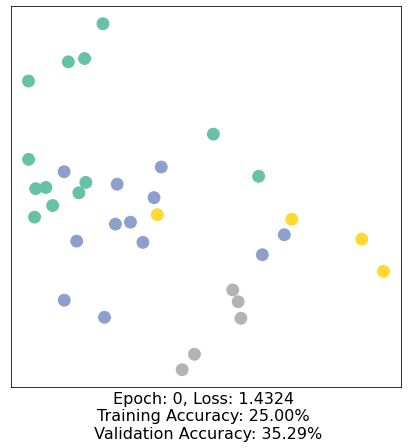

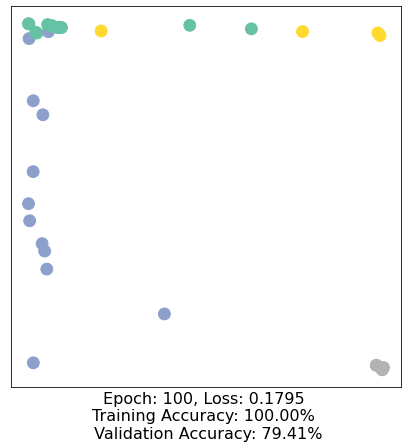

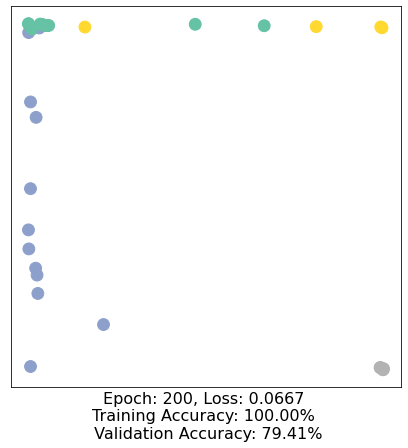

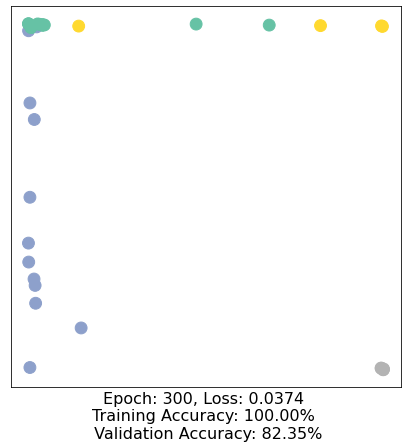

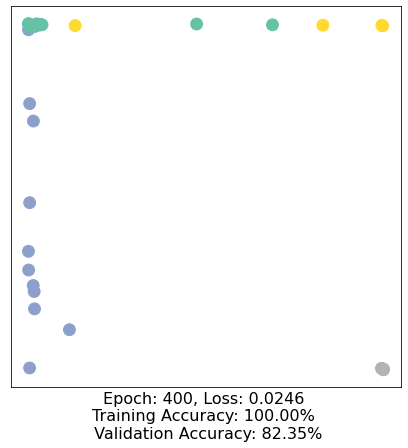

In [73]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # loss를 크로스 엔트로피로 정의.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 옵티마이저를 adam이용.

def train(data):
    optimizer.zero_grad()  # 그래디언트 초기화.
    out, h = model(data.x, data.edge_index)  # single forward.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # 훈련 노드를 기반으로 loss 계산.
    loss.backward()  # 그래디언트의 계산.
    optimizer.step()  # 가중치 업데이트.

    accuracy = {}
    # training accuracy 정확도를 4개의 examples를 이용하여 계산
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    
    # validation accuracy를 전체 그래프를 이용하여 계산
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # 10epochs마다 임베딩 시각화
    if epoch % 100 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

## Documentation



더 자세한 내용에 대해서는 다음의 문서를 참고하자. [documentation](https://pytorch-geometric.readthedocs.io/en/latest/).